In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #importing libraray
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))   #sigmoid fn

In [2]:
df1=pd.read_csv('C:\\Users\\PRASHANT\\Desktop\\coding dec19\\weather-data-in-new-york-city-2016\\ex2data1.csv')
df1.head()     #loading data from csv file and printing top 5 entry

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [3]:
#x1=df1.iloc[:,[0]]
#x2=df1.iloc[:,[1]]
m,n=df1.shape
XX=df1.iloc[:,0:n-1] #all row but 0 to n-1 column is taken as input
print(XX.shape,type(XX)) # separating input and output matrix XX is intial input matrix in dataframe
yy=df1.iloc[:,[n-1]]     #yy is initial data frame for output matrix it takes only last column and all row
print(yy.shape,type(yy))

print("m= {}, n={} ".format(m,n))
n=n-1
#print(X.iloc[:,[0]])
print("updated m= {}, n={} ".format(m,n))  #m is no of data and n is no of feature

(99, 2) <class 'pandas.core.frame.DataFrame'>
(99, 1) <class 'pandas.core.frame.DataFrame'>
m= 99, n=3 
updated m= 99, n=2 


In [4]:
x0=np.ones([m,1])
X=x0
print(X.shape)

(99, 1)


In [5]:
#here we take output all column one by one normalise it and then stack then together
# also we stack a column of one as first column
X=np.ones([m,1])  
div_normaliser=[]#we store factor by which divide each element of feature before passing to hypothesis
sub_normaliser=[] #we store factor by which substarct each element of feature before passing to hypothesis

#for normalisating each feature  we first substarct with mean then divide by standard deviation of each fature

for j in range(0,n):   # nth column will not be included there are n column in X 0 to n-1
    x1=df1.iloc[:,[j]]
    #print(x1)
    x1=np.array(x1)
    #print(x1)
    sub_normaliser.append(x1.mean()) #soring for further
    print("x1 mean is ",x1.mean())

    x1=(x1-x1.mean())# substract each element with mean of that feature
    
    div_normaliser.append(x1.std())#storing for further calculation
    print("x1 standard deviation is ",x1.std())
    x1=x1/x1.std()
     
    
    print(x1.shape,type(x1))
    X=np.hstack([X,x1])   #one by one add all column

print(X.shape,type(X))

#we get n+1 column in input as column of ones is added


x1 mean is  65.95761359704846
x1 standard deviation is  19.20427679982564
(99, 1) <class 'numpy.ndarray'>
x1 mean is  66.10277894945791
x1 standard deviation is  18.54450067226692
(99, 1) <class 'numpy.ndarray'>
(99, 3) <class 'numpy.ndarray'>


In [6]:

Y=np.array(yy)
print(Y.shape,type(Y))
print(X.shape,type(X))

(99, 1) <class 'numpy.ndarray'>
(99, 3) <class 'numpy.ndarray'>


In [7]:
theta=np.zeros([n+1,1])
alpha=0.01
print(" alpha ie learning rate is ",alpha)
print("theta is \n",theta)

 alpha ie learning rate is  0.01
theta is 
 [[0.]
 [0.]
 [0.]]


In [8]:
temp=X.dot(theta)    #computing cost
predict=sigmoid(temp)
temp1=(Y.transpose()).dot(np.log(predict))
temp2=(1-Y.transpose()).dot(np.log(1-predict))
temp=temp1+temp2
cost=(-1/m)*np.sum(temp)
"""X2=X.dot(theta)-Y
X3=X2**2 #perform element wise square
cost=(1/(2*m))*np.sum(X3)"""
cost=float(cost)
print(cost)

0.6931471805599454


In [9]:
print(sum(Y))

[60]


In [10]:

lx=[]
lx.append(0)
ly=[]
ly.append(cost)
for i1 in range(15000):
    #X2=X.dot(theta)-Y
    X2=X.dot(theta)
    predict=sigmoid(X2)
    
    
    
    
    X4=(1/m)*(X.transpose()).dot(predict-Y)# gradient descent fn remain same only hypotesis change
   
    #calculating cost after each iteration
    theta=theta-alpha*X4
    
    if i1%50==0:
        temp=X.dot(theta)
        predict=sigmoid(temp)
        temp1=(Y.transpose()).dot(np.log(predict))
        temp2=(1-Y.transpose()).dot(np.log(1-predict))# printing costing and storing it here for ploting
        temp=temp1+temp2
        cost=(-1/m)*np.sum(temp)
        cost=float(cost)
        print("i1 = {}, cost = {} ".format(i1,cost))
        lx.append(i1*5)
        ly.append(cost)
       # 
       
    

i1 = 0, cost = 0.6916133111861773 
i1 = 50, cost = 0.6238039905566595 
i1 = 100, cost = 0.570574037778943 
i1 = 150, cost = 0.5283338609958064 
i1 = 200, cost = 0.49433914018449393 
i1 = 250, cost = 0.4665651743179721 
i1 = 300, cost = 0.4435366800661618 
i1 = 350, cost = 0.4241778393924443 
i1 = 400, cost = 0.40769781943511435 
i1 = 450, cost = 0.39350846696261554 
i1 = 500, cost = 0.3811665464431879 
i1 = 550, cost = 0.37033345706182963 
i1 = 600, cost = 0.36074705235107307 
i1 = 650, cost = 0.35220176631449157 
i1 = 700, cost = 0.3445344475930546 
i1 = 750, cost = 0.3376141420885688 
i1 = 800, cost = 0.3313346328972485 
i1 = 850, cost = 0.3256089268964954 
i1 = 900, cost = 0.3203651316063873 
i1 = 950, cost = 0.31554333660111406 
i1 = 1000, cost = 0.31109322913753756 
i1 = 1050, cost = 0.30697225242083387 
i1 = 1100, cost = 0.3031441692255498 
i1 = 1150, cost = 0.2995779314267334 
i1 = 1200, cost = 0.2962467826435543 
i1 = 1250, cost = 0.293127540164144 
i1 = 1300, cost = 0.29020001

i1 = 11250, cost = 0.20992282851421343 
i1 = 11300, cost = 0.20987503611618888 
i1 = 11350, cost = 0.20982775852138072 
i1 = 11400, cost = 0.20978098882291774 
i1 = 11450, cost = 0.20973472022959755 
i1 = 11500, cost = 0.2096889460635133 
i1 = 11550, cost = 0.2096436597577388 
i1 = 11600, cost = 0.20959885485406968 
i1 = 11650, cost = 0.20955452500081953 
i1 = 11700, cost = 0.20951066395066967 
i1 = 11750, cost = 0.20946726555857048 
i1 = 11800, cost = 0.20942432377969317 
i1 = 11850, cost = 0.20938183266743038 
i1 = 11900, cost = 0.20933978637144451 
i1 = 11950, cost = 0.20929817913576265 
i1 = 12000, cost = 0.2092570052969158 
i1 = 12050, cost = 0.20921625928212229 
i1 = 12100, cost = 0.20917593560751363 
i1 = 12150, cost = 0.20913602887640206 
i1 = 12200, cost = 0.2090965337775879 
i1 = 12250, cost = 0.20905744508370636 
i1 = 12300, cost = 0.20901875764961234 
i1 = 12350, cost = 0.20898046641080253 
i1 = 12400, cost = 0.20894256638187353 
i1 = 12450, cost = 0.20890505265501463 
i1 =

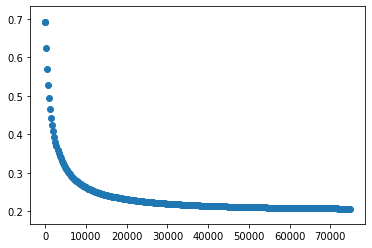

theta is  [[1.45890695]
 [3.28771729]
 [3.10492972]]


In [11]:
plt.scatter(lx,ly) 
plt.show()
print("theta is ",theta) 


In [12]:
print(X)
x1=X[:,1]
x2=X[:,2]
print(x1.shape)
print(x2.shape)
print(x1[0])

[[ 1.         -1.85744578 -1.19754   ]
 [ 1.         -1.56789059  0.3666542 ]
 [ 1.         -0.30071501  1.08958303]
 [ 1.          0.6808443   0.49834707]
 [ 1.         -1.08696289 -0.52772557]
 [ 1.         -0.25259733  1.63976628]
 [ 1.          0.47214129 -1.05415432]
 [ 1.          0.52806847  1.14954784]
 [ 1.          0.96203604 -1.21703927]
 [ 1.          1.5571501  -1.5032759 ]
 [ 1.          0.47156396 -1.91428803]
 [ 1.          0.85134368  0.55969069]
 [ 1.          0.17740711  1.70486731]
 [ 1.         -1.37569744  0.53568614]
 [ 1.         -0.62416104  1.2458988 ]
 [ 1.          0.16207486 -0.72055373]
 [ 1.          0.10358327 -1.04743747]
 [ 1.          0.24494002  1.44648591]
 [ 1.          0.57389144 -0.99904633]
 [ 1.          0.07365099 -1.25451426]
 [ 1.          1.23509791 -0.01636135]
 [ 1.         -0.80309326 -0.93003137]
 [ 1.         -1.65304598 -1.18057912]
 [ 1.          0.62311526  0.15474027]
 [ 1.         -0.19196765  0.20769926]
 [ 1.          0.74111446

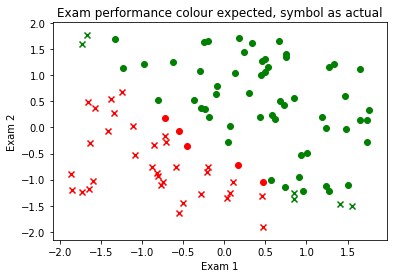

 x symbol show person is failed in actual ,o indicate person has passed in actual
 red colour show person is failed as predicted , green indicate person has passed as predicted
 green cross  symbolise person has failed in actual but predicted as pass 


In [13]:

col=[]
syb=[]
temp=X.dot(theta)
predict=sigmoid(temp)
for u1 in range(0,m):
    if predict[u1] >= 0.5:
        col.append("green")
        
    else:
        col.append("red")
        
for u1 in range(0,m):
    if Y[u1] == 1:
        
        syb.append("o")
    else:
        
        syb.append("x")
for u in range(0,m) :   
         plt.scatter(x1[u], x2[u],color=col[u],marker=syb[u]) 

  
# x-axis label 
plt.xlabel('Exam 1') 
# frequency label 
plt.ylabel('Exam 2') 
# plot title 
plt.title('Exam performance colour expected, symbol as actual') 
# showing legend 
#plt.legend() 
  
# function to show the plot 
plt.show() 
print(" x symbol show person is failed in actual ,o indicate person has passed in actual")
print(" red colour show person is failed as predicted , green indicate person has passed as predicted")
print(" green cross  symbolise person has failed in actual but predicted as pass ")

In [14]:
#print(X)
print(div_normaliser)
print(sub_normaliser)
final_theta=theta
print("final theta value after training is ",final_theta)
par1,par2=eval(input(" Exam 1 marks ")),eval(input(" Exam 2 marks "))
print(par1,par2)
par1=(par1-sub_normaliser[0])/div_normaliser[0]
par2=(par2-sub_normaliser[1])/div_normaliser[1]
print("par1 = ",par1," par2 = ",par2)
pft=theta[0]+theta[1]*par1+theta[2]*par2
pft=float(sigmoid(pft))
print("Your probability of passing is ",pft)
if pft>=0.5:
    print("probably you will get admission")
else:
    print("probably you will not get admission")

[19.20427679982564, 18.54450067226692]
[65.95761359704846, 66.10277894945791]
final theta value after training is  [[1.45890695]
 [3.28771729]
 [3.10492972]]
 Exam 1 marks 64
 Exam 2 marks 64
64 64
par1 =  -0.10193633519520183  par2 =  -0.11339097162117688
Your probability of passing is  0.6838881114129352
probably you will get admission
